In [ ]:
## Elif Arda - 140101026

In [1]:
import csv
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
import warnings
warnings.filterwarnings('ignore')

In [2]:
car_df = pd.read_csv('./data.csv')

In [3]:
car_df.shape

(11914, 16)

In [4]:
car_df.dtypes

Make                 object
Model                object
Year                  int64
EngineFuelType       object
EngineHP            float64
EngineCylinders     float64
TransmissionType     object
Driven_Wheels        object
NumberofDoors       float64
MarketCategory       object
VehicleSize          object
VehicleStyle         object
highwayMPG            int64
citympg               int64
Popularity            int64
MSRP                  int64
dtype: object

[Text(0.5, 0, 'Year'),
 Text(1.5, 0, 'EngineHP'),
 Text(2.5, 0, 'EngineCylinders'),
 Text(3.5, 0, 'NumberofDoors'),
 Text(4.5, 0, 'highwayMPG'),
 Text(5.5, 0, 'citympg'),
 Text(6.5, 0, 'Popularity'),
 Text(7.5, 0, 'MSRP')]

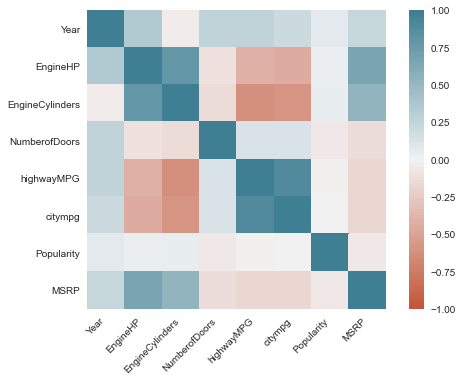

In [5]:
corrMatrix = car_df.corr()
ax = sns.heatmap(corrMatrix, vmin=-1, vmax=1, center=0,cmap=sns.diverging_palette(20, 220, n=200),square=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45,horizontalalignment='right')

In [6]:
car_df = car_df.dropna()
car_df = pd.get_dummies(car_df, columns=['Make'])
car_df = pd.get_dummies(car_df, columns=['EngineFuelType'])
car_df = pd.get_dummies(car_df, columns=['TransmissionType'])
car_df = pd.get_dummies(car_df, columns=['Driven_Wheels'])
car_df = pd.get_dummies(car_df, columns=['VehicleSize'])
car_df = pd.get_dummies(car_df, columns=['VehicleStyle'])

In [7]:
car_df["Price"] = ""
car_df.loc[car_df['MSRP'] <= 50000 , "Price"] = 0
car_df.loc[car_df['MSRP'] > 50000, "Price"] = 1

car_df['Price'] = pd.to_numeric(car_df['Price'], errors='coerce')
car_df = car_df.dropna(subset=['Price'])
car_df['Price'] = car_df['Price'].astype(int)

In [8]:
car_df['EngineHP'] = pd.to_numeric(car_df['EngineHP'], errors='coerce')
car_df = car_df.dropna(subset=['EngineHP'])
car_df['EngineHP'] = car_df['EngineHP'].astype(int)

car_df['EngineCylinders'] = pd.to_numeric(car_df['EngineCylinders'], errors='coerce')
car_df = car_df.dropna(subset=['EngineCylinders'])
car_df['EngineCylinders'] = car_df['EngineCylinders'].astype(int)

car_df['NumberofDoors'] = pd.to_numeric(car_df['NumberofDoors'], errors='coerce')
car_df = car_df.dropna(subset=['NumberofDoors'])
car_df['NumberofDoors'] = car_df['NumberofDoors'].astype(int)

In [9]:
x = car_df.drop(['Model','MSRP','Price','Popularity','MarketCategory'],axis=1)
y = car_df['Price'].values.reshape(-1,1)

In [10]:
x.head()

,Year,EngineHP,EngineCylinders,NumberofDoors,highwayMPG,citympg,Make_Acura,Make_Alfa Romeo,Make_Aston Martin,Make_Audi,...,VehicleStyle_Convertible,VehicleStyle_Convertible SUV,VehicleStyle_Coupe,VehicleStyle_Crew Cab Pickup,VehicleStyle_Extended Cab Pickup,VehicleStyle_Passenger Minivan,VehicleStyle_Passenger Van,VehicleStyle_Regular Cab Pickup,VehicleStyle_Sedan,VehicleStyle_Wagon
0,2011,335,6,2,26,19,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,2011,300,6,2,28,19,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,2011,300,6,2,28,20,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,2011,230,6,2,28,18,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,2011,230,6,2,28,18,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [11]:
y.shape

(8084, 1)

[Text(0.5, 0, 'Year'),
 Text(3.5, 0, 'NumberofDoors'),
 Text(6.5, 0, 'Popularity'),
 Text(9.5, 0, 'Make_Alfa Romeo'),
 Text(12.5, 0, 'Make_BMW'),
 Text(15.5, 0, 'Make_Buick'),
 Text(18.5, 0, 'Make_Chrysler'),
 Text(21.5, 0, 'Make_Ferrari'),
 Text(24.5, 0, 'Make_Genesis'),
 Text(27.5, 0, 'Make_Hyundai'),
 Text(30.5, 0, 'Make_Lamborghini'),
 Text(33.5, 0, 'Make_Lincoln'),
 Text(36.5, 0, 'Make_Maybach'),
 Text(39.5, 0, 'Make_Mercedes-Benz'),
 Text(42.5, 0, 'Make_Oldsmobile'),
 Text(45.5, 0, 'Make_Porsche'),
 Text(48.5, 0, 'Make_Scion'),
 Text(51.5, 0, 'Make_Suzuki'),
 Text(54.5, 0, 'Make_Volvo'),
 Text(57.5, 0, 'EngineFuelType_flex-fuel (premium unleaded recommended/E85)'),
 Text(60.5, 0, 'EngineFuelType_premium unleaded (recommended)'),
 Text(63.5, 0, 'TransmissionType_AUTOMATED_MANUAL'),
 Text(66.5, 0, 'TransmissionType_MANUAL'),
 Text(69.5, 0, 'Driven_Wheels_four wheel drive'),
 Text(72.5, 0, 'VehicleSize_Compact'),
 Text(75.5, 0, 'VehicleStyle_2dr Hatchback'),
 Text(78.5, 0, 'VehicleS

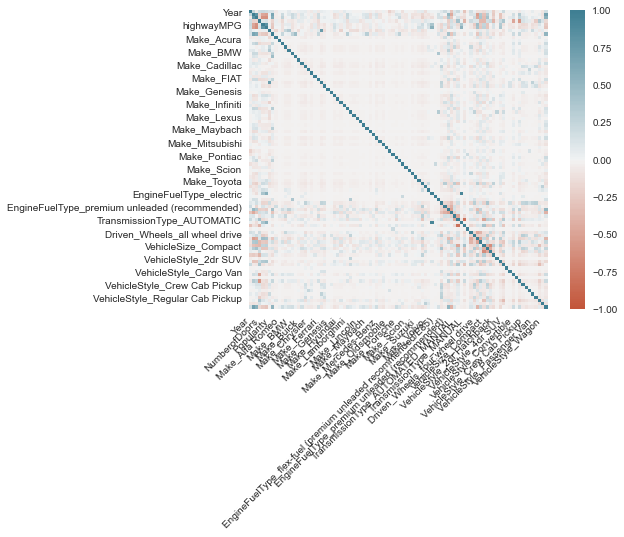

In [12]:
corrMatrix = car_df.corr()
ax = sns.heatmap(corrMatrix, vmin=-1, vmax=1, center=0,cmap=sns.diverging_palette(20, 220, n=200),square=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45,horizontalalignment='right')

In [13]:
from sklearn.preprocessing import MinMaxScaler

MinMax_scaler = MinMaxScaler()
X_scaled = MinMax_scaler.fit_transform(x)
y_scaled = MinMax_scaler.fit_transform(y)

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size = 0.30)
print("x_train: ",X_train.shape)
print("y_train: ",y_train.shape)
print("x_test: ",X_test.shape)
print("y_test: ",y_test.shape)

x_train:  (5658, 89)
y_train:  (5658, 1)
x_test:  (2426, 89)
y_test:  (2426, 1)


In [15]:
import tensorflow.keras
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout


model = Sequential()
model.add(Dense(45,input_dim =89, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(45, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(25, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 45)                4050      
_________________________________________________________________
dropout (Dropout)            (None, 45)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 45)                2070      
_________________________________________________________________
dropout_1 (Dropout)          (None, 45)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 25)                1150      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 26        
Total params: 7,296
Trainable params: 7,296
Non-trainable params: 0
______________________________________________________

In [16]:
# Compile Model  
adm = keras.optimizers.Adam(lr=0.001)
sgd = keras.optimizers.SGD(lr=0.001, decay=1e-6, momentum=0.5, nesterov=True)

model.compile(optimizer=adm, loss='mean_absolute_error',metrics='accuracy')

epochs_hist = model.fit(X_train, y_train, epochs=100, batch_size=128,  verbose=1, validation_split=0.10)

Epoch 1/100
40/40 [==============================] - 2s 39ms/step - loss: 0.4096 - accuracy: 0.7147 - val_loss: 0.2155 - val_accuracy: 0.7933
Epoch 2/100
40/40 [==============================] - 0s 4ms/step - loss: 0.2435 - accuracy: 0.7633 - val_loss: 0.2052 - val_accuracy: 0.7933
Epoch 3/100
40/40 [==============================] - 0s 4ms/step - loss: 0.2373 - accuracy: 0.7610 - val_loss: 0.1989 - val_accuracy: 0.7933
Epoch 4/100
40/40 [==============================] - 0s 4ms/step - loss: 0.2249 - accuracy: 0.7613 - val_loss: 0.1811 - val_accuracy: 0.7933
Epoch 5/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1979 - accuracy: 0.7971 - val_loss: 0.1526 - val_accuracy: 0.8922
Epoch 6/100
40/40 [==============================] - 0s 4ms/step - loss: 0.1673 - accuracy: 0.8488 - val_loss: 0.1153 - val_accuracy: 0.9028
Epoch 7/100
40/40 [==============================] - 0s 4ms/step - loss: 0.1447 - accuracy: 0.8695 - val_loss: 0.0956 - val_accuracy: 0.9117
Epoch 8/100


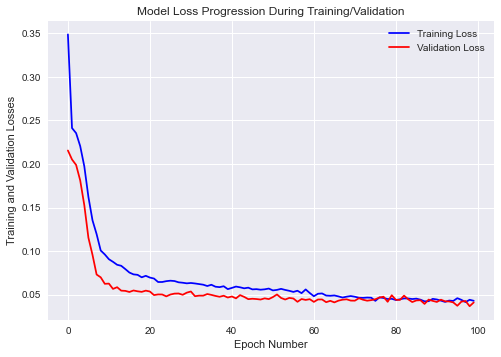

In [17]:
# Training - Validation Loss
plt.plot(epochs_hist.history['loss'], color = 'blue')
plt.plot(epochs_hist.history['val_loss'], color = 'red')
plt.title('Model Loss Progression During Training/Validation')
plt.ylabel('Training and Validation Losses')
plt.xlabel('Epoch Number')
plt.legend(['Training Loss', 'Validation Loss'])
plt.savefig('Loss',dpi=300)

In [18]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred = model.predict_classes(X_test, verbose = 1)
correct = np.sum(y_pred ==  y_test)

print ('Test Accuracy: ', correct/float(y_test.shape[0])*100.0, '%')

print('Macro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='macro')*100))
print('Macro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='macro')*100))
print('Macro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='macro')*100))

76/76 [==============================] - 0s 1ms/step
Test Accuracy:  95.42456718878813 %
Macro Precision: 95.06
Macro Recall: 92.07
Macro F1-score: 93.45



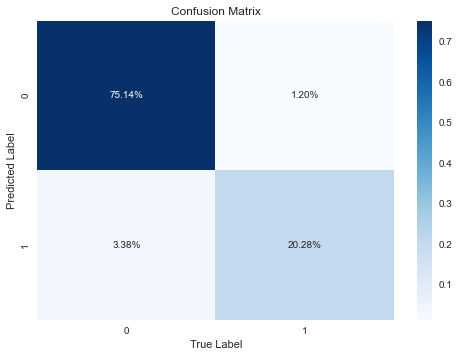

In [19]:
from sklearn.metrics import confusion_matrix

result = confusion_matrix(y_test,y_pred)
sns.heatmap(result/np.sum(result), annot=True,fmt='.2%', cmap=plt.cm.Blues)
plt.ylabel('Predicted Label')
plt.xlabel('True Label')
plt.title('Confusion Matrix')
plt.savefig('Confusion Matrix',dpi=300)

Auc Score: 92.07420549213205


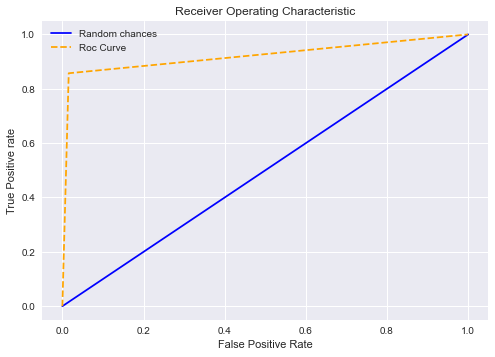

In [20]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr1, tpr1, thresh1 = roc_curve(y_test, y_pred, pos_label=1)

random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

auc_score1 = roc_auc_score(y_test, y_pred)
print("Auc Score:" ,auc_score1*100)

plt.plot(p_fpr, p_tpr, linestyle='-', color='blue',label='Random chances')
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Roc Curve')

# title
plt.title('Receiver Operating Characteristic')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show()